In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import matplotlib.pyplot as plt

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv('C:\\Users\\katha\\OneDrive\\Desktop\\sem2\\project\\population prediction\\pop.csv')
df.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965  ...         2012         2013         2014         2015  \
0      57357.0  ...     102565.0     103165.0     103776.0     104339.0   
1  148769974.0  ...  547482863.0  562601578.0  578075373.0  593871847.0   
2    9956318.0  ...   31161378.0   32269592.0   33370804.0   34413603.0   
3  107289875.0  ...  370243017.0  380437896.0  390882979.0  401586651.0   
4    5770573.0  ...   25107925.0   26015786.0   26941773.0   27884380.0   

          2016         2017         2018         2019         2020  \
0     104865.0     105361.0     105846.0     106310.0     106766.0   
1  609978946.0  626392880.0  643090131.0  660046272.0  677243299.0   
2   35383028.0   36296111.0   37171922.0   38041757.0   38928341.0   
3  412551299.0  423769930.0  435229381.0  446911598.0  458803476.0   
4   28842482.0   29816769.0   30809787.0   31825299.0   32866268.0   

          2021  
0     107195.0  
1  694665117.0  
2   39835428.0  
3  470898870.0  
4   33933611.0  

[5 rows x 66 columns]

In [36]:
bd=df.loc[df['Country Name']=='Canada']
bd.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
bd = bd.T
bd.head()

35
1960  17909009.0
1961  18271000.0
1962  18614000.0
1963  18964000.0
1964  19325000.0

In [37]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={35:'population','index':'year'})
bd.head()

year  population
0  1960  17909009.0
1  1961  18271000.0
2  1962  18614000.0
3  1963  18964000.0
4  1964  19325000.0

In [38]:
bd.to_csv('bd.csv', index=False)

In [40]:
bd = pd.read_csv('C:\\Users\\katha\\OneDrive\\Desktop\\sem2\\project\\population prediction\\bd.csv')

Text(0, 0.5, 'Population')

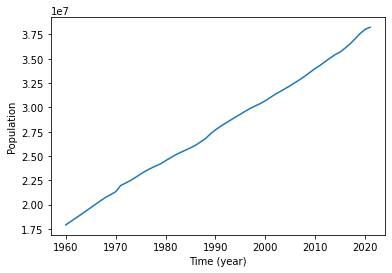

In [41]:
bd = plt.plot(bd['year'], bd['population'])
plt.xlabel('Time (year)')
plt.ylabel('Population')

In [11]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2019]])
y_pred

array([[37026473.59182596]])

In [ ]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2019]])
y_pred

In [13]:
def country_list_gen(df):
    df.rename(columns={'Country Name':'country_name'},inplace=True)
    df['country_name'] = df['country_name'].apply(lambda row: row.lower())
    lists = df['country_name'].unique().tolist()
    with open('country_list.json','w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False,indent=4)
    return lists, df

In [16]:
def selecting_country(df,country):
    """
    this function will 
    """
    df = df.loc[df['country_name']==country]
    df.drop(['country_name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df

def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model

def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

In [42]:
def main():
    country = input("Please input the country name: ").lower()
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('C:\\Users\\katha\\OneDrive\\Desktop\\sem2\\project\\population prediction\\pop.csv')
    lists, df = country_list_gen(df)
    if country in lists:
        df = selecting_country(df, country)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {country.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check country name spelling from country_list.json')
    
if __name__ == "__main__":
    main()


Please input the country name: CANADA
Please input the year to predict: 2030

 Result: CANADA population in 2030 will be 40,563,650


In [24]:
function data_reshape = getCsvData(filename)
%GETCSVDATA load the csv data into cell array

    fileID = fopen(filename,'r');
    % Start row is 1 since the first line is the heading (name of the columns)
    startRow = 1;
    data = textscan(fileID, '%d %d\n', 'Delimiter', ';',...
        'HeaderLines', startRow,'ReturnOnError', false);
    fclose(fileID);

    [M N] = size(data{1,1});
    data_reshape = cell(M,2);

    for i=1:M
        data_reshape{i, 1} = data{1,1}(i);
        data_reshape{i, 2} = data{1,2}(i);
    end
end

SyntaxError: invalid syntax (3937395742.py, line 1)